In [1]:
import muon as mu
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir

/home/kvalem/.conda/envs/tcr_2024/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df = pd.read_csv("/data/projects/2022/CRCA/results/v0.1/crc-atlas-dataset/latest/ds_analyses/liana_cell2cell/neutrophil_subclusters/tumor_blood/neutrophil.csv")


df = pd.read_csv(
    f"/data/projects/2022/CRCA/results/v1/final/liana_cell2cell/core_atlas/tumor_normal/epithelial_cancer/epithelial_cancer.csv"
)

In [4]:
df

,Unnamed: 0,cell_type_middle,fraction_expressed,expr_mean,source,target,source_genesymbol,target_genesymbol,lr_means,cellphone_pvals,...,magnitude_rank,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,group,fdr
0,0,Cancer cell,0.741189,4.470367,Schwann cell,Enteroendocrine,L1CAM,EPHB2,1.215764,0.0,...,0.001159,7.850310,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04
1,1,Cancer cell,0.741189,4.470367,Schwann cell,Epithelial progenitor,L1CAM,EPHB2,1.199925,0.0,...,0.001473,7.850310,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04
2,2,Cancer cell,0.741189,4.470367,Schwann cell,Cancer cell,L1CAM,EPHB2,1.192190,0.0,...,0.003412,7.850310,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04
3,3,Cancer cell,0.741189,4.470367,Schwann cell,Tuft,L1CAM,EPHB2,1.158540,0.0,...,0.024920,7.850310,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04
4,4,Cancer cell,0.741189,4.470367,Schwann cell,Goblet,L1CAM,EPHB2,1.126360,0.0,...,0.051496,7.850310,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,2947,Fibroblast,0.209559,2.651813,Monocyte,Pericyte,PSAP,AR,1.043755,0.0,...,0.689714,178.931713,1.356977,0.204892,6.622901,3.522174e-11,3.037624e-09,1.082748,tumor_vs_normal,8.229080e-10
2948,2948,Pericyte,0.138002,2.075213,Macrophage,Fibroblast,PSAP,AR,1.247376,0.0,...,0.326326,178.931713,1.356977,0.204892,6.622901,3.522174e-11,3.037624e-09,1.082748,tumor_vs_normal,8.229080e-10
2949,2949,Pericyte,0.138002,2.075213,Macrophage,Pericyte,PSAP,AR,1.226796,0.0,...,0.412929,178.931713,1.356977,0.204892,6.622901,3.522174e-11,3.037624e-09,1.082748,tumor_vs_normal,8.229080e-10
2950,2950,Pericyte,0.138002,2.075213,Monocyte,Fibroblast,PSAP,AR,1.064335,0.0,...,0.435069,178.931713,1.356977,0.204892,6.622901,3.522174e-11,3.037624e-09,1.082748,tumor_vs_normal,8.229080e-10


In [5]:
set(df.cell_type_middle)

{'B cell',
 'CD4',
 'CD8',
 'Cancer cell',
 'Dendritic cell',
 'Endothelial cell',
 'Epithelial cell',
 'Epithelial progenitor',
 'Fibroblast',
 'Goblet',
 'Macrophage',
 'Mast cell',
 'Monocyte',
 'Neutrophil',
 'Pericyte',
 'Plasma cell',
 'Treg',
 'Tuft'}

In [6]:
df_ss = df[
    df["cell_type_middle"].isin(
        [
            "Enteroendocrine",
            "B cell",
            "Schwann cell",
            "Endothelial cell",
            "Neutrophil",
            "NKT",
            "Plasma cell",
            "Treg",
            "Pericyte",
            "Tuft",
            "Mast cell",
            "Macrophage",
            "Fibroblast",
            "Monocyte",
            "CD4",
            "Goblet",
            "Cancer cell",
            "Epithelial progenitor",
            "Epithelial cell", 'CD4',
 'CD8', 'Treg', 'Dendritic cell',
        ]
    )
]

## CELL OF INTEREST interactions

In [7]:
df_ss_cell = df_ss

In [8]:
df_ss_cell["cluster_1"] = "Cancer cell"

In [9]:
df_ss_cell["new_column_cell"] = (
    df_ss_cell["source_genesymbol"]
    + df_ss_cell["target_genesymbol"]
    + df_ss_cell["source"]
    + df_ss_cell["cluster_1"]
)

In [10]:
unique_rows_cell = df_ss_cell.drop_duplicates(subset="new_column_cell")

In [11]:
unique_rows_cell

,Unnamed: 0,cell_type_middle,fraction_expressed,expr_mean,source,target,source_genesymbol,target_genesymbol,lr_means,cellphone_pvals,...,log2FoldChange,lfcSE,stat,pvalue,padj,weight,group,fdr,cluster_1,new_column_cell
0,0,Cancer cell,0.741189,4.470367,Schwann cell,Enteroendocrine,L1CAM,EPHB2,1.215764,0.0,...,-2.030870,0.519845,-3.906684,9.357147e-05,7.389376e-04,0.965047,tumor_vs_normal,5.865334e-04,Cancer cell,L1CAMEPHB2Schwann cellCancer cell
30,30,B cell,0.349906,4.425596,CD8,B cell,CCL4,CNR2,0.763483,0.0,...,1.297278,0.451568,2.872830,4.068132e-03,1.534240e-02,1.082748,tumor_vs_normal,1.713951e-02,Cancer cell,CCL4CNR2CD8Cancer cell
31,31,Cancer cell,0.235568,2.339933,Neutrophil,Schwann cell,CXCL8,SDC3,2.326405,0.0,...,1.911034,0.470084,4.065304,4.796990e-05,3.866275e-04,1.086171,tumor_vs_normal,3.625960e-04,Cancer cell,CXCL8SDC3NeutrophilCancer cell
33,33,Cancer cell,0.235568,2.339933,Monocyte,Schwann cell,CXCL8,SDC3,1.734352,0.0,...,1.911034,0.470084,4.065304,4.796990e-05,3.866275e-04,1.086171,tumor_vs_normal,3.625960e-04,Cancer cell,CXCL8SDC3MonocyteCancer cell
61,61,Endothelial cell,0.771414,6.495057,Endothelial cell,Endothelial cell,EDN1,ADGRL4,0.643238,0.0,...,-1.010303,0.425242,-2.375831,1.750948e-02,6.357432e-02,0.803012,tumor_vs_normal,5.844073e-02,Cancer cell,EDN1ADGRL4Endothelial cellCancer cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2894,Cancer cell,0.522835,4.003828,Macrophage,Plasma cell,MMP9,IFNAR1,0.744140,0.0,...,3.996015,0.614041,6.507733,7.629331e-11,5.913315e-09,1.086171,tumor_vs_normal,1.633948e-09,Cancer cell,MMP9IFNAR1MacrophageCancer cell
2912,2912,CD8,0.447903,4.783457,Macrophage,Macrophage,CD14,ITGB2,0.951475,0.0,...,2.814462,0.570436,4.933881,8.061157e-07,1.333904e-05,1.082748,tumor_vs_normal,8.632156e-06,Cancer cell,CD14ITGB2MacrophageCancer cell
2914,2914,CD8,0.447903,4.783457,Monocyte,Macrophage,CD14,ITGB2,0.824006,0.0,...,2.814462,0.570436,4.933881,8.061157e-07,1.333904e-05,1.082748,tumor_vs_normal,8.632156e-06,Cancer cell,CD14ITGB2MonocyteCancer cell
2944,2944,Fibroblast,0.209559,2.651813,Macrophage,Fibroblast,PSAP,AR,1.247376,0.0,...,1.356977,0.204892,6.622901,3.522174e-11,3.037624e-09,1.082748,tumor_vs_normal,8.229080e-10,Cancer cell,PSAPARMacrophageCancer cell


In [12]:
unique_rows_cell.cell_type_middle.unique()

array(['Cancer cell', 'B cell', 'Endothelial cell', 'Mast cell',
       'Macrophage', 'CD8', 'Fibroblast', 'Neutrophil', 'CD4', 'Treg',
       'Plasma cell', 'Epithelial progenitor', 'Epithelial cell'],
      dtype=object)

In [13]:
unique_rows_cell.target.unique()

array(['Enteroendocrine', 'B cell', 'Schwann cell', 'Endothelial cell',
       'Neutrophil', 'NKT', 'Plasma cell', 'Treg', 'Pericyte', 'Tuft',
       'Mast cell', 'Macrophage', 'Fibroblast', 'Monocyte',
       'Epithelial progenitor', 'CD4', 'Goblet', 'Cancer cell', 'CD8',
       'Epithelial cell'], dtype=object)

In [14]:
unique_rows_cell = unique_rows_cell[
    unique_rows_cell["source"].isin(
        [
            "Enteroendocrine",
            "B cell",
            "Schwann cell",
            "Endothelial cell",
            "Neutrophil",
            "NKT",
            "Plasma cell",
            "Treg",
            "Pericyte",
            "Tuft",
            "Mast cell",
            "Macrophage",
            "Fibroblast",
            "Monocyte",
            "CD4",
            "Goblet",
            "Cancer cell",
            "Epithelial progenitor",
            "Epithelial cell",
        ]
    )
]

In [15]:
unique_sources_cell = unique_rows_cell["cluster_1"].unique()
unique_targets_cell = unique_rows_cell["cell_type_middle"].unique()

In [16]:
interaction_matrix_cell = pd.DataFrame(
    [(src, tgt) for src in unique_sources_cell for tgt in unique_targets_cell],
    columns=["source", "target"],
)

In [17]:
count_df_cell = (
    unique_rows_cell.groupby(["cluster_1", "target"]).size().reset_index(name="n")
)
count_df_cell.rename(columns={"cluster_1": "source"}, inplace=True)
interaction_matrix_cell = interaction_matrix_cell.merge(
    count_df_cell, on=["source", "target"], how="left"
).fillna(0)
interaction_matrix_cell = interaction_matrix_cell.pivot(
    index="target", columns="source", values="n"
).fillna(0)
interaction_matrix_cell = interaction_matrix_cell.astype(int)

## All cells interactions

In [18]:
df_ss["new_column"] = (
    df_ss["source_genesymbol"]
    + df_ss["target_genesymbol"]
    + df_ss["source"]
    + df_ss["target"]
)

In [19]:
unique_rows = df_ss.drop_duplicates(subset="new_column")

In [20]:
unique_rows = unique_rows[
    df["source"].isin(
        [
            "Enteroendocrine",
            "B cell",
            "Schwann cell",
            "Endothelial cell",
            "Neutrophil",
            "NKT",
            "Plasma cell",
            "Treg",
            "Pericyte",
            "Tuft",
            "Mast cell",
            "Macrophage",
            "Fibroblast",
            "Monocyte",
            "CD4",
            "Goblet",
            "Cancer cell",
            "Epithelial progenitor",
            "Epithelial cell",
        ]
    )
]

/tmp/ipykernel_2534781/3001803224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = unique_rows[


In [21]:
unique_rows = unique_rows[
    unique_rows["target"].isin(
        [
            "Enteroendocrine",
            "B cell",
            "Schwann cell",
            "Endothelial cell",
            "Neutrophil",
            "NKT",
            "Plasma cell",
            "Treg",
            "Pericyte",
            "Tuft",
            "Mast cell",
            "Macrophage",
            "Fibroblast",
            "Monocyte",
            "CD4",
            "Goblet",
            "Cancer cell",
            "Epithelial progenitor",
            "Epithelial cell",
        ]
    )
]

In [22]:
unique_sources = unique_rows["cell_type_middle"].unique()
unique_targets = unique_rows["cell_type_middle"].unique()

In [23]:
interaction_matrix = pd.DataFrame(
    [(src, tgt) for src in unique_sources for tgt in unique_targets],
    columns=["source", "target"],
)
count_df = unique_rows.groupby(["source", "target"]).size().reset_index(name="n")
interaction_matrix = interaction_matrix.merge(
    count_df, on=["source", "target"], how="left"
).fillna(0)
interaction_matrix = interaction_matrix.pivot(
    index="target", columns="source", values="n"
).fillna(0)
interaction_matrix = interaction_matrix.astype(int)

In [24]:
interaction_matrix_cell

source,Cancer cell
target,
B cell,4
CD4,1
CD8,6
Cancer cell,1
Endothelial cell,50
Epithelial cell,1
Epithelial progenitor,4
Fibroblast,18
Macrophage,26


In [25]:
interaction_matrix

source,B cell,CD4,CD8,Cancer cell,Endothelial cell,Epithelial cell,Epithelial progenitor,Fibroblast,Macrophage,Mast cell,Neutrophil,Plasma cell,Treg
target,,,,,,,,,,,,,
B cell,0,0,0,0,1,0,0,3,3,0,1,0,0
CD4,0,0,0,0,1,0,0,0,5,0,0,0,0
CD8,0,0,0,0,0,0,0,0,0,0,0,0,0
Cancer cell,0,0,0,0,0,0,0,4,1,0,0,0,0
Endothelial cell,0,0,0,0,6,1,0,6,13,1,10,0,0
Epithelial cell,0,0,0,0,0,0,0,2,1,0,0,0,0
Epithelial progenitor,0,0,0,0,0,0,0,5,2,0,1,0,0
Fibroblast,0,0,0,0,3,0,0,4,5,0,3,0,0
Macrophage,1,0,0,0,1,0,0,10,20,0,2,0,0


In [26]:
interaction_matrix["Cancer cell"] = list(interaction_matrix_cell["Cancer cell"])

In [27]:
interaction_matrix = interaction_matrix.T

In [28]:
interaction_matrix

target,B cell,CD4,CD8,Cancer cell,Endothelial cell,Epithelial cell,Epithelial progenitor,Fibroblast,Macrophage,Mast cell,Neutrophil,Plasma cell,Treg
source,,,,,,,,,,,,,
B cell,0,0,0,0,0,0,0,0,1,0,0,0,2
CD4,0,0,0,0,0,0,0,0,0,1,0,0,1
CD8,0,0,0,0,0,0,0,0,0,0,0,0,0
Cancer cell,4,1,6,1,50,1,4,18,26,8,16,2,22
Endothelial cell,1,1,0,0,6,0,0,3,1,0,3,0,2
Epithelial cell,0,0,0,0,1,0,0,0,0,0,0,0,0
Epithelial progenitor,0,0,0,0,0,0,0,0,0,0,0,0,0
Fibroblast,3,0,0,4,6,2,5,4,10,3,9,1,0
Macrophage,3,5,0,1,13,1,2,5,20,5,7,1,17


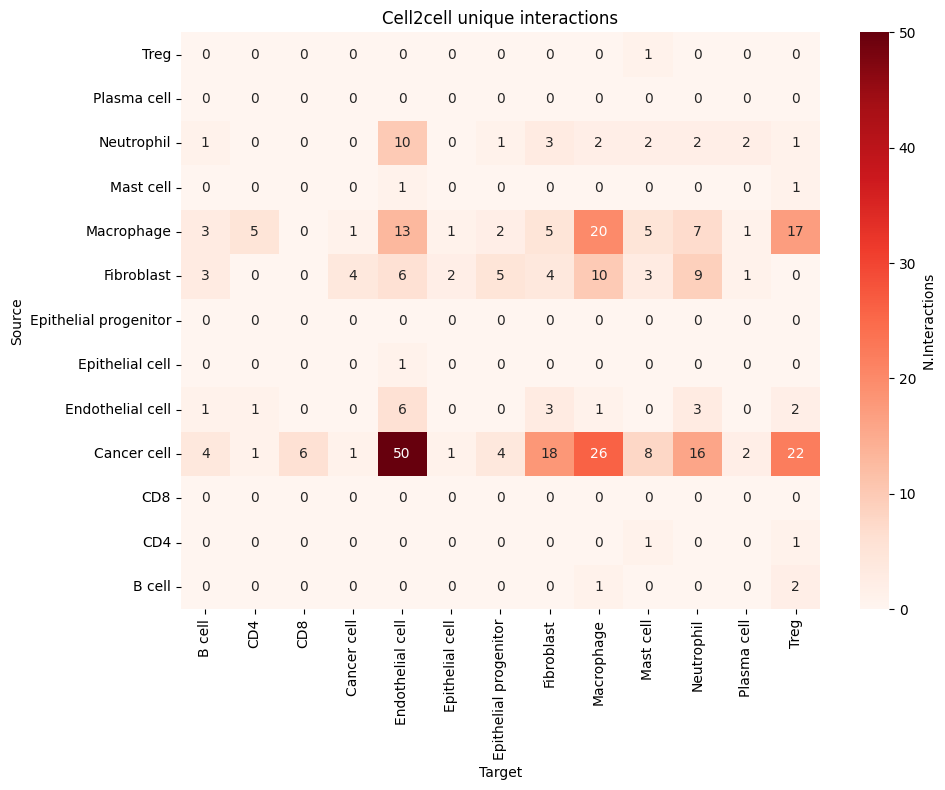

In [29]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(interaction_matrix, annot=True, fmt="d", cmap="Reds", cbar=True)
heatmap.invert_yaxis()
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("N.Interactions")
# Adding labels and title
plt.title("Cell2cell unique interactions")
plt.xlabel("Target")
plt.ylabel("Source")
# Adjust layout to ensure everything fits into the figure area
plt.tight_layout()
# plt.savefig('/data/scratch/kvalem/projects/2022/crc_atlas_circos_plot/06-reports/05072024_Zlatko/c2c_unique_heatmap.svg' )
# plt.savefig('/data/scratch/kvalem/projects/2022/crc_atlas_circos_plot/06-reports/05072024_Zlatko/c2c_unique_heatmap.png' )

In [30]:
interaction_matrix = np.array(interaction_matrix)
# Sum all the numbers in the interaction matrix
total_sum = np.sum(interaction_matrix)

In [31]:
total_sum

336